# **PCA (Principal Component Analysis) Handson**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Import dataset (Today we use inbuilt dataset)
from sklearn.datasets import load_digits

In [ ]:
dataset = load_digits()
dataset

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [ ]:
df = pd.DataFrame(dataset['data'], columns = dataset['feature_names'])
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [ ]:
#If we check any random value in the dictonary to see the pattern
dataset.data[1795].reshape(8,8)

array([[ 0.,  0.,  2., 10.,  7.,  0.,  0.,  0.],
       [ 0.,  0., 14., 16., 16., 15.,  1.,  0.],
       [ 0.,  4., 16.,  7.,  3., 16.,  7.,  0.],
       [ 0.,  5., 16., 10.,  7., 16.,  4.,  0.],
       [ 0.,  0.,  5., 14., 14., 16.,  4.,  0.],
       [ 0.,  0.,  0.,  0.,  0., 16.,  2.,  0.],
       [ 0.,  0.,  4.,  7.,  7., 16.,  2.,  0.],
       [ 0.,  0.,  5., 12., 16., 12.,  0.,  0.]])

np.int64(9)

<Figure size 640x480 with 0 Axes>

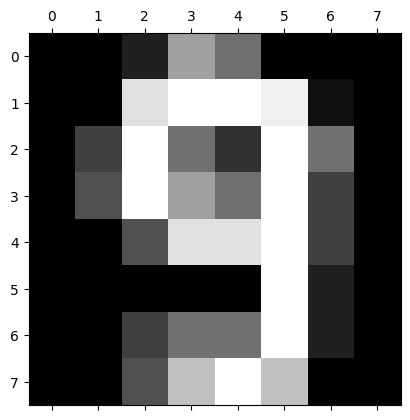

In [ ]:
#Visualize this on graph
plt.gray()    # based on the numbers you have smaller number will be darkers and bigger number will be light
plt.matshow(dataset.data[1795].reshape(8,8))
plt.show

dataset.target[1795]      #checking the value of target column

<Figure size 640x480 with 0 Axes>

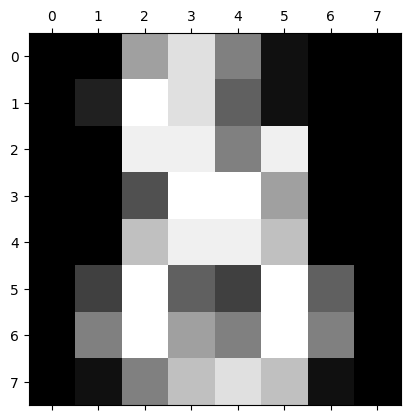

np.int64(8)

In [ ]:
plt.gray()
plt.matshow(dataset.data[1796].reshape(8,8))
plt.show()

dataset.target[1796]

In [ ]:
dataset.data[1].reshape(8,8)

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

<Axes: >

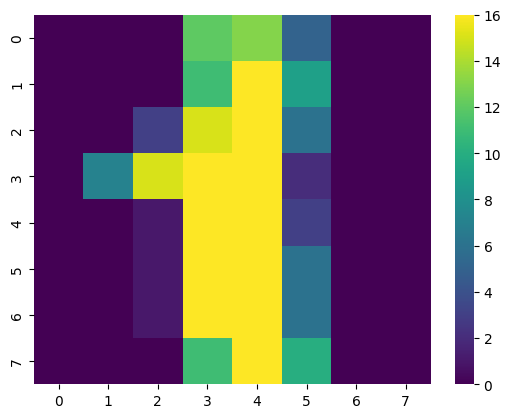

In [ ]:
sns.heatmap(dataset.data[1].reshape(8,8),cmap="viridis")

In [ ]:
#We have not introduced 'Target' column becasuse we are performing PCA (which only works on independent columns)
target = pd.DataFrame(dataset.target)
target

,0
0,0
1,1
2,2
3,3
4,4
...,...
1792,9
1793,0
1794,8
1795,9


In [ ]:
# as we can see from the above data we are having 64 columns that can leads to the dimensionality curse( overfitting due to large number of columns) thus
# we will apply PCA to reduce the dimentions

# Steps to apply PCA (Principle component Analysis)

In [ ]:
# -->collect the data
#     -->standardization of the data
#         --> covariance matrix
#             --->Eigen values and vectors
#                     -->select the principle components

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc= StandardScaler()

In [ ]:
df_scaled = sc.fit_transform(df)
df_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [ ]:
# after this whatever we are doing is only to get Eigen values and vect

#Transpose flips the perspective from "samples compared to samples"  "features compared to features.
#Covariance is feature-to-feature comparison, so we align features in rows

In [ ]:
pd.DataFrame(df_scaled).T

,0,1,2,3,4,5,6,7,8,9,...,1787,1788,1789,1790,1791,1792,1793,1794,1795,1796
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,...,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016
2,-0.043081,-1.094937,-1.094937,0.377661,-1.094937,1.429517,-1.094937,0.377661,0.798404,1.219146,...,1.008775,-1.094937,0.588032,-0.043081,-1.094937,-0.253452,0.167290,-0.884566,-0.674195,1.008775
3,0.274072,0.038648,-1.844742,0.744919,-2.551014,-0.432200,0.038648,-0.903047,0.509495,0.038648,...,0.980343,-2.551014,0.980343,0.038648,-2.080166,-0.432200,0.980343,-0.196776,-0.432200,0.509495
4,-0.664478,0.268751,0.735366,0.268751,-0.197863,-2.764242,0.268751,0.268751,-0.897785,-2.764242,...,0.735366,0.035444,-2.064321,-0.897785,0.735366,0.268751,0.268751,0.735366,-1.131092,-0.897785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.208293,-0.249010,-2.078218,0.208293,-2.306869,0.894246,-0.706312,-1.620916,0.894246,-0.020358,...,0.208293,-2.764171,0.894246,-0.020358,-2.535520,0.436944,0.894246,-0.706312,-0.020358,-0.020358
60,-0.366771,0.849632,-0.164037,0.241430,0.849632,0.849632,0.646898,-2.394110,0.646898,0.241430,...,-0.366771,0.444164,-0.366771,0.038697,0.849632,0.646898,0.444164,0.241430,0.849632,0.444164
61,-1.146647,0.548561,1.565686,0.379040,-0.468564,0.548561,0.718081,-1.146647,0.718081,-0.638085,...,-0.468564,0.379040,-0.977127,-0.638085,-0.468564,0.379040,-0.129523,-0.129523,0.887602,0.887602
62,-0.505670,-0.505670,1.695137,-0.505670,-0.505670,-0.505670,0.227932,-0.505670,-0.261136,-0.505670,...,-0.505670,-0.505670,-0.505670,-0.505670,-0.505670,-0.505670,-0.505670,-0.505670,-0.505670,-0.261136


In [ ]:
# covaraince matrix for the given data
#table that shows how each feature in your dataset varies with every other feature.

- Positive covariance: When one feature increases, the other tends to increase.
- Negative covariance: When one feature increases, the other tends to decrease.
- Zero (or near zero): No linear relationship.

In [ ]:
cov_matrix = np.cov(df_scaled.T)
cov_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.00055679,  0.55692803, ..., -0.02988686,
         0.02656195, -0.04391324],
       [ 0.        ,  0.55692803,  1.00055679, ..., -0.04120565,
         0.07263924,  0.08256908],
       ...,
       [ 0.        , -0.02988686, -0.04120565, ...,  1.00055679,
         0.64868875,  0.26213704],
       [ 0.        ,  0.02656195,  0.07263924, ...,  0.64868875,
         1.00055679,  0.62077355],
       [ 0.        , -0.04391324,  0.08256908, ...,  0.26213704,
         0.62077355,  1.00055679]])

In [ ]:
# calculation of Eigen Values and Vectors
eigen_values,eigen_vectors = np.linalg.eig(cov_matrix)

In [ ]:
eigen_values

array([7.34477606, 5.83549054, 5.15396118, 3.96623597, 2.9663452 ,
       2.57204442, 2.40600941, 2.06867355, 1.82993314, 1.78951739,
       1.69784616, 1.57287889, 1.38870781, 1.35933609, 1.32152536,
       1.16829176, 1.08368678, 0.99977862, 0.97438293, 0.90891242,
       0.82271926, 0.77631014, 0.71155675, 0.64552365, 0.59527399,
       0.5765018 , 0.52673155, 0.5106363 , 0.48686381, 0.45560107,
       0.44285155, 0.42230086, 0.3991063 , 0.39110111, 0.36094517,
       0.34860306, 0.3195963 , 0.05037444, 0.29406627, 0.27692285,
       0.06328961, 0.258273  , 0.24783029, 0.2423566 , 0.07635394,
       0.08246812, 0.09018543, 0.09840876, 0.10250434, 0.11188655,
       0.11932898, 0.12426371, 0.13321081, 0.14311427, 0.217582  ,
       0.15818474, 0.16875236, 0.20799593, 0.17612894, 0.2000909 ,
       0.18983516, 0.        , 0.        , 0.        ])

In [ ]:
eigen_vectors

array([[ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.18223392, -0.04702701,  0.02358821, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.285868  , -0.0595648 , -0.05679875, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.103198  ,  0.24261778, -0.02227952, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.1198106 ,  0.16508926,  0.10036559, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.07149362,  0.07132924,  0.09244589, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
total = sum(eigen_values)
print(total)


var_exp = [(i/total)*100 for i in sorted(eigen_values, reverse=True)] # Individual explained variance
var_exp


"""for i in sorted(eigen_values):
  print(i)
  print(i/sum(eigne_values))*100"""

var_exp

61.03396436525629


[np.float64(12.033916097734904),
 np.float64(9.561054403097883),
 np.float64(8.444414892624566),
 np.float64(6.498407907524167),
 np.float64(4.860154875966403),
 np.float64(4.214119869271944),
 np.float64(3.9420828035674003),
 np.float64(3.3893809246383264),
 np.float64(2.998221011625232),
 np.float64(2.9320025512522068),
 np.float64(2.781805463550326),
 np.float64(2.5770550925819995),
 np.float64(2.2753033157642486),
 np.float64(2.227179739514353),
 np.float64(2.1652294318492435),
 np.float64(1.9141666064421259),
 np.float64(1.7755470851681938),
 np.float64(1.6380692742844212),
 np.float64(1.5964601688623428),
 np.float64(1.4891911870878194),
 np.float64(1.3479695658179378),
 np.float64(1.2719313702347599),
 np.float64(1.1658373505919493),
 np.float64(1.0576465985363224),
 np.float64(0.9753159471981139),
 np.float64(0.9445589897319981),
 np.float64(0.8630138269707229),
 np.float64(0.8366428536685183),
 np.float64(0.7976932484112456),
 np.float64(0.7464713709260611),
 np.float64(0.7255

In [ ]:
var_exp

[np.float64(12.033916097734904),
 np.float64(9.561054403097883),
 np.float64(8.444414892624566),
 np.float64(6.498407907524167),
 np.float64(4.860154875966403),
 np.float64(4.214119869271944),
 np.float64(3.9420828035674003),
 np.float64(3.3893809246383264),
 np.float64(2.998221011625232),
 np.float64(2.9320025512522068),
 np.float64(2.781805463550326),
 np.float64(2.5770550925819995),
 np.float64(2.2753033157642486),
 np.float64(2.227179739514353),
 np.float64(2.1652294318492435),
 np.float64(1.9141666064421259),
 np.float64(1.7755470851681938),
 np.float64(1.6380692742844212),
 np.float64(1.5964601688623428),
 np.float64(1.4891911870878194),
 np.float64(1.3479695658179378),
 np.float64(1.2719313702347599),
 np.float64(1.1658373505919493),
 np.float64(1.0576465985363224),
 np.float64(0.9753159471981139),
 np.float64(0.9445589897319981),
 np.float64(0.8630138269707229),
 np.float64(0.8366428536685183),
 np.float64(0.7976932484112456),
 np.float64(0.7464713709260611),
 np.float64(0.7255

In [ ]:
cum_var_exp = np.cumsum(var_exp)     #  cumsum function is used here to get the cumulative contribution of informationn by each columns
cum_var_exp

array([ 12.0339161 ,  21.5949705 ,  30.03938539,  36.5377933 ,
        41.39794818,  45.61206805,  49.55415085,  52.94353177,
        55.94175279,  58.87375534,  61.6555608 ,  64.23261589,
        66.50791921,  68.73509895,  70.90032838,  72.81449499,
        74.59004207,  76.22811135,  77.82457152,  79.3137627 ,
        80.66173227,  81.93366364,  83.09950099,  84.15714759,
        85.13246353,  86.07702252,  86.94003635,  87.77667921,
        88.57437245,  89.32084382,  90.04642598,  90.73833722,
        91.39224576,  92.03303833,  92.62442244,  93.19558485,
        93.71922165,  94.20102924,  94.6547485 ,  95.07791125,
        95.48396432,  95.88104913,  96.23754243,  96.57832961,
        96.90616495,  97.21719696,  97.50577225,  97.78226151,
        98.04143645,  98.27591946,  98.49417632,  98.69777395,
        98.89328638,  99.07660488,  99.24455127,  99.40578733,
        99.55355002,  99.68866843,  99.81376918,  99.91746491,
       100.        , 100.        , 100.        , 100.  

In [ ]:
pd.DataFrame(cum_var_exp)

,0
0,12.033916
1,21.594971
2,30.039385
3,36.537793
4,41.397948
...,...
59,99.917465
60,100.000000
61,100.000000
62,100.000000


In [ ]:
#Scree Plot

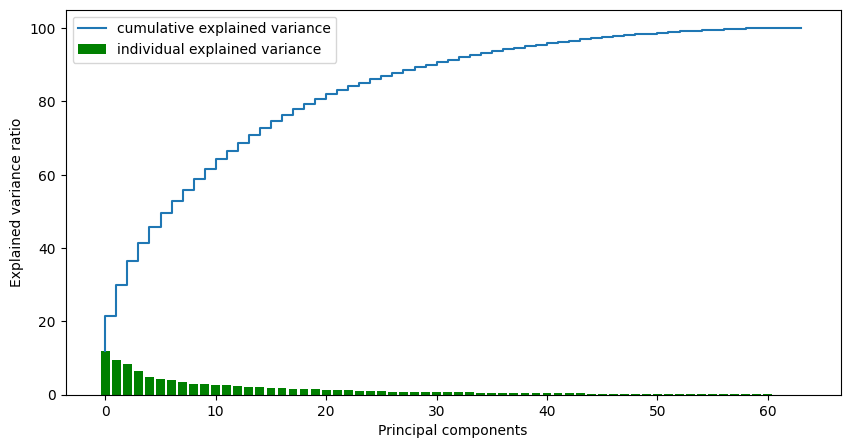

In [ ]:
# Plot name is Scree Plot   to get the idea reference to compute how may columns will give how much information

plt.figure(figsize=(10, 5))

plt.bar(range(len(var_exp)), var_exp, label='individual explained variance', color = 'g')

plt.step(range(len(cum_var_exp)), cum_var_exp,label='cumulative explained variance')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend()
plt.show()

In [ ]:
# Optimal  number of components can be between 20 to 30 as I can see in this range lot of dimentions has been reduce and we are not facing much information loss

# Implementation of PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
model = PCA(n_components=20)    #model=PCA(0.80)  # alternative way in which you will select the percentage of information you want to get

In [ ]:
x_pca = model.fit_transform(df_scaled)
x_pca

array([[-1.91421366, -0.95450157, -3.94603482, ..., -0.09005675,
         0.41275404,  0.43051695],
       [-0.58898033,  0.9246358 ,  3.92475494, ..., -0.42200012,
         0.55308473, -0.06967631],
       [-1.30203906, -0.31718883,  3.02333293, ..., -0.46522263,
        -1.06555601, -1.13345406],
       ...,
       [-1.02259599, -0.14791087,  2.46997365, ...,  0.66924528,
        -1.61210006,  0.18230257],
       [-1.07605522, -0.38090625, -2.45548693, ...,  0.81182201,
        -1.76918064,  0.77471846],
       [ 1.25770233, -2.22759088,  0.28362789, ...,  1.94421279,
        -2.43897852, -1.13276155]])

In [ ]:
x_pca.shape

(1797, 20)

In [ ]:
x_pca = pd.DataFrame(x_pca)
x_pca    # independent

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1.914214,-0.954502,-3.946035,-2.028723,-0.267173,0.530327,-1.415321,1.496062,0.124914,-0.822246,-0.499693,-0.789466,0.228125,-0.195142,0.837040,0.104341,0.185323,-0.090057,0.412754,0.430517
1,-0.588980,0.924636,3.924755,1.779850,-0.993430,-0.675652,1.878565,0.556336,1.079877,0.087451,-0.505000,0.641593,-0.048361,-0.392054,-0.744412,-0.214072,-0.101727,-0.422000,0.553085,-0.069676
2,-1.302039,-0.317189,3.023333,2.043376,-2.081155,0.935121,-1.296200,1.156160,0.785606,-1.099206,2.196453,-2.310276,-0.566874,-0.995772,-1.170505,0.399017,-0.240298,-0.465223,-1.065556,-1.133454
3,3.020770,-0.868772,-0.801744,2.187039,-0.556813,0.727124,0.959766,-1.382638,0.259075,0.744555,-1.065129,0.491755,-0.166579,1.008790,-0.141893,-1.000781,-0.950687,-0.400034,1.490825,0.308128
4,-4.528949,-1.093480,0.973121,1.419510,-1.715106,1.431592,1.073649,-0.968240,-1.660216,1.174593,-1.017440,-1.365994,-0.343716,-0.113469,0.732635,0.210692,-0.094411,-0.552371,1.613976,1.086368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,-0.104331,0.255024,-3.765861,1.947006,-0.190094,-0.555760,0.531222,0.476475,1.152430,-0.473054,-0.635879,0.803622,1.205195,-0.700724,0.187246,0.161669,0.504438,0.357642,-0.956725,0.816109
1793,-2.423234,-1.429611,-3.045245,-2.632089,-0.822902,0.004061,-1.106872,2.330903,0.569455,-1.654173,-0.460155,-0.530551,0.858305,0.885069,-0.702222,1.098425,0.301699,-0.311522,-0.307535,0.110083
1794,-1.022596,-0.147911,2.469974,0.620307,-0.972043,-0.007377,0.381115,0.529064,2.054709,-2.036838,-0.679554,0.396803,-0.409313,0.257614,0.334953,1.162071,1.124031,0.669245,-1.612100,0.182303
1795,-1.076055,-0.380906,-2.455487,1.312013,0.253533,-0.638322,1.034470,0.763325,1.077474,-0.334527,-0.980131,0.606451,0.169573,-0.759176,0.014572,0.158465,1.686638,0.811822,-1.769181,0.774718


In [ ]:
y=dataset.target
y

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
#Splitting data into training testing
#building model (  Decision Tree, Random forest)
- training model
- testing
- evaluating Performance

In [ ]:
#Splitting  data into training and Testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.3,random_state=0)

In [ ]:
from sklearn.metrics import *

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model=RandomForestClassifier()

In [ ]:
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
rf_pred=rf_model.predict(x_test)
rf_pred

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 5, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       7, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 5, 3, 7, 5,
       1, 2, 9, 9, 3, 1, 7, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 1, 4, 7,
       3, 4, 8, 9, 7, 9, 8, 2, 6, 9, 2, 5, 3, 4, 1, 4, 0, 6, 1, 5, 9, 9,
       9, 5, 9, 9, 5, 7, 5, 6, 2, 8, 6, 7, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3,
       6, 1, 8, 9, 7, 7, 6, 7, 6, 5, 6, 0, 8, 1, 9, 9, 6, 1, 0, 4, 1, 6,
       3, 8, 6, 7, 4, 9, 6, 9, 0, 2, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 8, 9,
       6, 4, 5, 0, 1, 4, 6, 4, 3, 3, 0, 9, 5, 9, 2, 1, 4, 2, 1, 6, 8, 9,
       2, 4, 9, 3, 7, 6, 2, 3, 3, 1, 6, 9, 3, 6, 3, 2, 2, 0, 7, 6, 1, 1,
       9, 7, 2, 7, 8, 5, 5, 7, 5, 2, 3, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5,
       9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 2, 6, 8, 8, 8, 4, 6, 7, 5, 2, 4,
       5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 2, 9, 0,

In [ ]:
y_test

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 5, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       2, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 5, 3, 7, 5,
       1, 2, 9, 9, 3, 1, 7, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 1, 4, 7,
       3, 4, 8, 9, 7, 9, 8, 2, 6, 5, 2, 5, 8, 4, 8, 7, 0, 6, 1, 5, 9, 9,
       9, 5, 9, 9, 5, 7, 5, 6, 2, 8, 6, 9, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3,
       6, 1, 8, 9, 8, 7, 6, 7, 6, 5, 6, 0, 8, 8, 9, 8, 6, 1, 0, 4, 1, 6,
       3, 8, 6, 7, 4, 5, 6, 3, 0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 8, 9,
       6, 4, 5, 0, 1, 4, 6, 4, 3, 3, 0, 9, 5, 9, 2, 1, 4, 2, 1, 6, 8, 9,
       2, 4, 9, 3, 7, 6, 2, 3, 3, 1, 6, 9, 3, 6, 3, 2, 2, 0, 7, 6, 1, 1,
       9, 7, 2, 7, 8, 5, 5, 7, 5, 2, 3, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5,
       9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 2, 6, 8, 8, 8, 4, 6, 7, 5, 2, 4,
       5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 2, 9, 0,

In [ ]:
accuracy_score(y_test,rf_pred)

0.95

###LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

  **Inorder to find the number of components required for LDA, we can use a simple formula that is `n-1`**

  **Just assume there are n people, so how many lines we would need to distinguish between the given n persons**

  **If incase, you are having more number of features as compared to your classes, you need to use `min(no of features, no_of_classes - 1)`**

In [ ]:
# to Find out the n_components in LDA

# The Formula

# min(ind_fet, n(class)-1)


#min(64,10-1)
#min(64,9)

#n_components=9

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, y,test_size = 0.3, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test) # It will standardise the testing data in the same scalse of training

In [ ]:
LDA = LinearDiscriminantAnalysis(n_components=9)

In [ ]:
x_train = LDA.fit_transform(x_train, y_train)
x_test = LDA.transform(x_test)

In [ ]:
x_train.shape

(1257, 9)

In [ ]:
x_test.shape

(540, 9)

In [ ]:
model = RandomForestClassifier()

In [ ]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
pred = model.predict(x_test)
pred

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       9, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 9, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       2, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 9, 3, 7, 5,
       1, 2, 9, 9, 3, 1, 7, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 1, 4, 7,
       3, 4, 8, 9, 7, 7, 8, 2, 8, 5, 2, 5, 8, 4, 1, 4, 0, 6, 1, 5, 3, 9,
       9, 5, 9, 9, 5, 7, 5, 6, 2, 8, 6, 7, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3,
       6, 1, 8, 9, 8, 7, 6, 7, 6, 5, 6, 0, 8, 8, 9, 8, 6, 1, 0, 4, 1, 6,
       3, 8, 6, 7, 4, 9, 6, 3, 0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 8, 9,
       6, 4, 5, 0, 1, 4, 6, 4, 3, 3, 0, 9, 5, 3, 2, 1, 4, 2, 1, 6, 8, 9,
       2, 4, 9, 3, 7, 6, 2, 3, 3, 1, 6, 9, 3, 6, 3, 2, 2, 0, 7, 6, 1, 1,
       9, 7, 2, 7, 8, 5, 5, 7, 5, 3, 8, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5,
       9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 2, 6, 1, 8, 8, 4, 6, 7, 5, 2, 4,
       5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 2, 9, 0,

In [ ]:
accuracy_score(y_test, pred) * 100

94.62962962962963

In [ ]:
#For more practice, follow this dataset -

Dataset - https://drive.google.com/file/d/1X0ml6RH2Npogu6GCRxOS0wwYzgFi2vEq/view?usp=sharing